In [2]:
# Hack for adding to PATH since I'm too lazy to use packages.
import sys
sys.path.append('..')


from src.data_loader import CelebData, FairFaceData
from torchvision.transforms.functional import to_pil_image

In [2]:
def get_img(img_tup):
    return to_pil_image(img_tup[0])

# Sample Mode

In [3]:
sample = False # change this to True for sample mode.

# Celeb Data

In [4]:
cdata = CelebData(root = '.', sample = sample) # sample = True -> sample mode

In [5]:
# set target to only output Male as -1 or 1
cdata.set_filter(['Male'])

In [6]:
cdata.get_all_filter()

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [7]:
# get people who are young and male.
dc_data = cdata.filter_dataset(filter_ = {'Young': 1, 'Male': 1})

In [8]:

img =  dc_data[0]

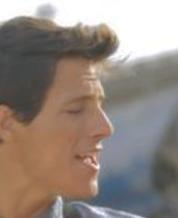

In [9]:
# image display
get_img(img)

In [10]:
print('Male:',img[1])

Male: tensor([1])


# FairFace

In [11]:
ffdata = FairFaceData(root = '.', sample = sample) # sample mode

In [12]:
ffdata.get_all_filter()

Index(['age', 'gender', 'race', 'service_test'], dtype='object')

In [13]:
ffdata.set_filter(['gender'])

In [14]:
ffdata.get_attr_map()

{'age': {'50-59': 0,
  '30-39': 1,
  '3-9': 2,
  '20-29': 3,
  '40-49': 4,
  '10-19': 5,
  '60-69': 6,
  '0-2': 7,
  'more than 70': 8},
 'gender': {'Male': 0, 'Female': 1},
 'race': {'East Asian': 0,
  'Indian': 1,
  'Black': 2,
  'White': 3,
  'Middle Eastern': 4,
  'Latino_Hispanic': 5,
  'Southeast Asian': 6},
 'service_test': {True: 0, False: 1}}

In [15]:
ffdata.attr_filter

,file,age,gender,race,service_test
index,,,,,
0,train/1.jpg,0,0,0,0
1,train/2.jpg,1,1,1,1
2,train/3.jpg,2,1,2,1
3,train/4.jpg,3,1,1,0
4,train/5.jpg,3,1,1,0
...,...,...,...,...,...
97693,val/10950.jpg,1,0,3,0
97694,val/10951.jpg,0,0,3,1
97695,val/10952.jpg,6,0,5,1


In [16]:
ffdata[0]

(tensor([[[ 8,  9, 10,  ..., 45, 45, 45],
          [ 7,  8,  9,  ..., 42, 41, 41],
          [ 6,  6,  8,  ..., 35, 34, 34],
          ...,
          [42, 42, 43,  ..., 20, 21, 20],
          [39, 39, 37,  ..., 21, 22, 22],
          [37, 37, 35,  ..., 24, 23, 23]],
 
         [[ 8,  9,  8,  ..., 26, 24, 24],
          [ 7,  8,  7,  ..., 25, 23, 23],
          [ 6,  6,  6,  ..., 24, 23, 23],
          ...,
          [25, 25, 27,  ..., 17, 18, 20],
          [27, 27, 27,  ..., 18, 19, 20],
          [26, 26, 26,  ..., 20, 21, 21]],
 
         [[10, 11, 11,  ..., 20, 21, 21],
          [ 9, 10, 10,  ..., 18, 19, 19],
          [ 8,  8,  7,  ..., 18, 19, 19],
          ...,
          [31, 31, 30,  ..., 10, 11, 10],
          [31, 31, 28,  ...,  9, 10,  8],
          [30, 30, 27,  ..., 11,  9,  9]]], dtype=torch.uint8),
 tensor([0]))

In [17]:
# filter all east asian
eadata = ffdata.filter_dataset(filter_={'race': 'East Asian'})

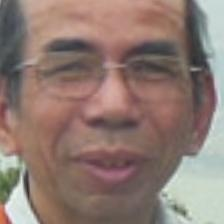

In [18]:
get_img(eadata[1])